In [2]:
OPENSLIDE_PATH = r"C:\Users\MS\openslide-bin-4.0.0.8-windows-x64\bin"

import os

if hasattr(os, "add_dll_directory"):
    # Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
    print(openslide.__version__)
else:
    print("nope")
    import openslide

1.3.1


In [4]:
import openslide
import numpy as np
import matplotlib.pyplot as plt

output = "C:\\Users\\MS\\Desktop\\IDEAS\\Projekty\\CD34\\Dane\\CD34_z_adnotacjami\\22_09617A1_7.mrxs"
slide = openslide.OpenSlide(output)
# Informacje o obrazie
print(f"Dimensions: {slide.dimensions}")
print(f"Level count: {slide.level_count}")

Dimensions: (90122, 204698)
Level count: 9


In [108]:
import xml.etree.ElementTree as ET
from asap_loader.annotation.objects.rectangle import Rectangle
from asap_loader.annotation.objects.group import Group
from asap_loader.annotation.objects.annotation_object import AnnotationObject
from pathlib import Path
from os import listdir

ROOT = "C:\\Users\\MS\\Desktop\\IDEAS\\Projekty\\CD34\\Dane\\CD34_z_adnotacjami"

filenames = listdir(ROOT)
filename = "22_21450A1_7"
xml_path = Path(ROOT, f"{filename}.xml")

tree = ET.parse(xml_path)
root = tree.getroot()


for child in root.find('AnnotationGroups'):
    group_data = {}
    if child.attrib["Name"] == "Obszary":
        group_data["name"] = child.attrib["Name"]
        group_data["color"] = child.attrib["Color"]
        group_data["group"] = (
            None if child.attrib["PartOfGroup"] == "None" else child.attrib["PartOfGroup"]
        )

        group = Group(**group_data)


for child in root[0]:
    if "Type" in child.attrib and child.attrib["Type"] == "Rectangle":

        rectangle_data = {
            "name": child.attrib["Name"],
            "color": child.attrib["Color"],
            "group": group
        }

        for coord in child[0]:
            # print(coord.attrib)
            if int(coord.attrib['Order']) == 0:
                rectangle_data["x_min"] = float(coord.attrib["X"])
                rectangle_data["y_min"] = float(coord.attrib["Y"])

            elif int(coord.attrib['Order']) == 2:
                temp_x = float(coord.attrib["X"])
                temp_y = float(coord.attrib["Y"])

        rectangle_data["x_max"] = max(temp_x, rectangle_data["x_min"])
        rectangle_data["y_max"] = max(temp_y, rectangle_data["y_min"])
        rectangle_data["x_min"] = min(temp_x, rectangle_data["x_min"])
        rectangle_data["y_min"] = min(temp_y, rectangle_data["y_min"])

        rectangle = Rectangle(**rectangle_data)

        # print(rectangle)

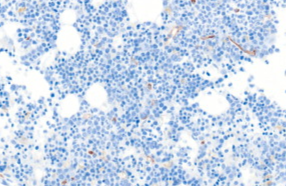

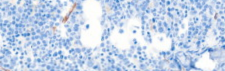

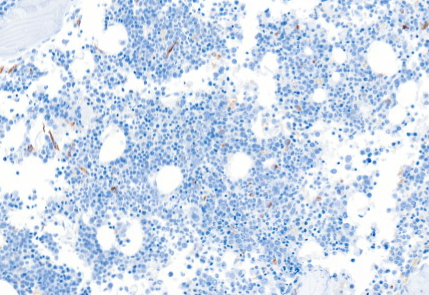

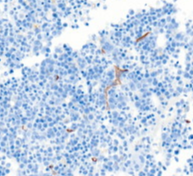

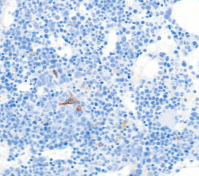

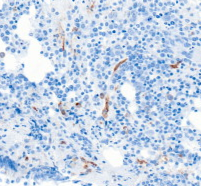

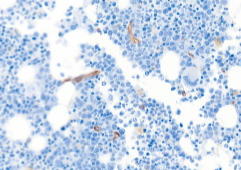

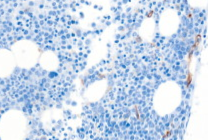

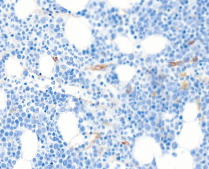

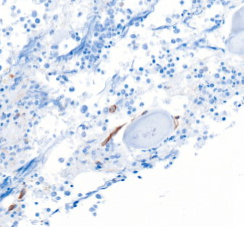

In [ ]:
from histolab.slide import Slide, CoordinatePair
from PIL import ImageDraw
from PIL.Image import Image
from IPython.display import display


slide_path = Path(ROOT, f"{filename}.mrxs")
slide = Slide(slide_path, "")

level = 2
downsample_ratio = slide.level_dimensions()[0] / slide.level_dimensions(level=level)[0]

for rect in group.members:
    base_size = (rect.x_max - rect.x_min, rect.y_max - rect.y_min)
    coordinates = CoordinatePair(
        int(rect.x_min),
        int(rect.y_min),
        int(rect.x_max),
        int(rect.y_max),
    )
    # print(coordinates)
    image = slide.extract_tile(
        coordinates,
        (
            int(base_size[0] / downsample_ratio),
            int(base_size[1] / downsample_ratio),
        ),
        level=level,
    ).image

    draw = ImageDraw.Draw(image)

    display(image)